In [1]:
import random
import pandas as pd
import numpy as np
from tqdm import tqdm
import sqlite3
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from collections import defaultdict

In [2]:
#pull in data
con = sqlite3.connect('nba.db')

team_basic_boxscores_df = pd.read_sql('select * from team_basic_boxscores', con)
team_advanced_boxscores_df = pd.read_sql('select * from team_advanced_boxscores', con)

team_boxscores_df = team_basic_boxscores_df.merge(team_advanced_boxscores_df, how='inner', on=['GAME_ID', 'TEAM_ID'])

pd.set_option('display.max_columns', None)
team_boxscores_df.head()

,SEASON,TEAM_ID,TEAM_ABBREVIATION_x,TEAM_NAME_x,GAME_ID,GAME_DATE,MATCHUP,WL,MIN_x,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,TEAM_NAME_y,TEAM_ABBREVIATION_y,TEAM_CITY,MIN_y,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,2021-22,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,240,45,95,0.474,15,42,0.357,9,19,0.474,5,40,45,21,7,4,18,25,114,-7,Lakers,LAL,Los Angeles,240:00,98.0,101.8,106.0,107.1,-8.0,-5.3,0.467,1.17,14.8,0.189,0.759,0.477,15.469,16.1,0.553,0.551,1.0,0.198,115.28,112.5,93.75,112.0,0.422
1,2021-22,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,41,93,0.441,14,39,0.359,25,30,0.833,9,41,50,30,9,2,17,18,121,7,Warriors,GSW,Golden State,240:00,106.0,107.1,98.0,101.8,8.0,5.3,0.732,1.76,19.6,0.241,0.811,0.523,14.886,15.0,0.516,0.570,1.0,0.200,115.28,112.5,93.75,113.0,0.578
2,2021-22,1610612751,BKN,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,240,37,84,0.440,17,32,0.531,13,23,0.565,5,39,44,19,3,9,13,17,104,-23,Nets,BKN,Brooklyn,240:00,101.8,102.0,117.7,124.5,-15.8,-22.5,0.514,1.46,15.1,0.176,0.707,0.459,12.730,12.7,0.542,0.552,1.0,0.200,105.02,102.0,85.00,102.0,0.407
3,2021-22,1610612749,MIL,Milwaukee Bucks,0022100001,2021-10-19,MIL vs. BKN,W,240,48,105,0.457,17,45,0.378,14,18,0.778,13,41,54,25,8,9,8,19,127,23,Bucks,MIL,Milwaukee,240:00,117.7,124.5,101.8,102.0,15.8,22.5,0.521,3.13,17.1,0.293,0.824,0.541,7.413,7.8,0.538,0.562,1.0,0.194,105.02,102.0,85.00,102.0,0.593
4,2021-22,1610612754,IND,Indiana Pacers,0022100003,2021-10-20,IND @ CHA,L,240,42,90,0.467,17,47,0.362,21,24,0.875,8,43,51,29,2,10,17,24,122,-1,Pacers,IND,Indiana,240:00,111.4,114.0,107.1,116.0,4.3,-2.0,0.690,1.71,19.8,0.255,0.667,0.487,15.517,15.9,0.561,0.607,1.0,0.199,112.22,106.5,88.75,107.0,0.520


In [3]:
team_boxscores_df.columns

Index(['SEASON', 'TEAM_ID', 'TEAM_ABBREVIATION_x', 'TEAM_NAME_x', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN_x', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'TEAM_NAME_y',
       'TEAM_ABBREVIATION_y', 'TEAM_CITY', 'MIN_y', 'E_OFF_RATING',
       'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'E_TM_TOV_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT',
       'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE'],
      dtype='object')

In [4]:
team_boxscores_df.drop(columns=['TEAM_NAME_y', 'TEAM_ABBREVIATION_y', 'MIN_y'], inplace=True)
team_boxscores_df.rename(columns={'TEAM_ABBREVIATION_x':'TEAM_ABBREVIATION', 'TEAM_NAME_x':'TEAM_NAME', 'MIN_x':'MIN'}, inplace=True)
team_boxscores_df.columns

Index(['SEASON', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'TEAM_CITY',
       'E_OFF_RATING', 'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'E_NET_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'E_TM_TOV_PCT', 'TM_TOV_PCT',
       'EFG_PCT', 'TS_PCT', 'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE',
       'PACE_PER40', 'POSS', 'PIE'],
      dtype='object')

In [5]:
team_boxscores_df.describe()

,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
count,5.630400e+04,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,5.630400e+04,5.630400e+04,56304.000000,56304.000000,56304.000000,49903.000000,49912.000000,44457.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.0,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000,56304.000000
mean,1.610613e+09,241.778737,37.589141,82.881536,0.454404,7.734868,21.697038,0.353087,18.141482,23.897272,0.759824,10.975259,31.672688,42.647947,22.085145,7.563441,4.890168,14.355179,20.967445,101.054632,0.000000,104.406966,106.023227,104.406966,106.023227,7.571854e-19,-3.785927e-19,0.586650,1.685603,16.907813,0.293722,0.706284,0.499996,14.829478,15.068304,0.500772,0.541711,1.0,0.198498,96.071499,94.567985,78.806646,95.258632,0.500002
std,8.618141e+00,7.518999,5.407827,7.936351,0.056343,4.088962,9.245157,0.114526,6.213455,7.660357,0.101744,3.965722,5.501733,6.579844,5.204027,2.904544,2.567072,3.939071,4.477937,13.358379,13.698552,11.642268,11.542424,11.642268,11.542424,1.487959e+01,1.431864e+01,0.104816,0.735106,3.292003,0.074629,0.074629,0.049031,3.933401,4.014015,0.067219,0.062329,0.0,0.002310,5.909439,5.768214,4.806822,6.370823,0.099968
min,1.610613e+09,240.000000,16.000000,51.000000,0.239000,0.000000,1.000000,0.000000,1.000000,1.000000,0.143000,0.000000,12.000000,17.000000,4.000000,0.000000,0.000000,1.000000,5.000000,53.000000,-73.000000,60.700000,60.900000,60.700000,60.900000,-7.120000e+01,-7.450000e+01,0.163000,0.280000,3.700000,0.024000,0.342000,0.303000,1.076000,1.100000,0.262000,0.319000,1.0,0.186000,77.160000,76.000000,63.330000,76.000000,-0.026000
25%,1.610613e+09,240.000000,34.000000,77.000000,0.416000,5.000000,15.000000,0.280000,14.000000,18.000000,0.696000,8.000000,28.000000,38.000000,18.000000,6.000000,3.000000,12.000000,18.000000,92.000000,-9.000000,96.500000,98.000000,96.500000,98.000000,-1.040000e+01,-9.400000e+00,0.515000,1.200000,14.700000,0.241000,0.656000,0.467000,12.072000,12.200000,0.455000,0.499000,1.0,0.197000,91.860000,90.500000,75.420000,91.000000,0.430000
50%,1.610613e+09,240.000000,37.000000,83.000000,0.453000,7.000000,20.000000,0.353000,18.000000,23.000000,0.765000,11.000000,31.000000,42.000000,22.000000,7.000000,5.000000,14.000000,21.000000,101.000000,0.000000,104.400000,106.100000,104.400000,106.100000,0.000000e+00,0.000000e+00,0.588000,1.540000,16.900000,0.293000,0.707000,0.500000,14.671000,14.900000,0.500000,0.540000,1.0,0.199000,95.760000,94.500000,78.750000,95.000000,0.500000
75%,1.610613e+09,240.000000,41.000000,88.000000,0.493000,10.000000,28.000000,0.429000,22.000000,29.000000,0.833000,13.000000,35.000000,47.000000,25.000000,9.000000,6.000000,17.000000,24.000000,110.000000,9.000000,112.200000,113.700000,112.200000,113.700000,1.040000e+01,9.400000e+00,0.658000,2.000000,19.100000,0.344000,0.759000,0.533000,17.406000,17.700000,0.545000,0.583000,1.0,0.200000,100.060000,98.500000,82.080000,99.000000,0.570000
max,1.610613e+09,340.000000,63.000000,129.000000,0.687000,29.000000,70.000000,1.000000,52.000000,64.000000,1.000000,38.000000,56.000000,81.000000,50.000000,22.000000,23.000000,34.000000,42.000000,168.000000,73.000000,152.100000,155.100000,152.100000,155.100000,7.120000e+01,7.450000e+01,0.974000,25.000000,30.100000,0.658000,0.976000,0.697000,32.854000,33.300000,0.795000,0.808000,1.0,0.206000,121.280000,120.000000,100.000000,145.000000,1.026000


In [6]:
#add home team flag
team_boxscores_df['HOME_TEAM'] = team_boxscores_df['MATCHUP'].str[4] == 'v'
team_boxscores_df['HOME_TEAM']

0         True
1        False
2        False
3         True
4        False
         ...  
56299    False
56300    False
56301     True
56302    False
56303     True
Name: HOME_TEAM, Length: 56304, dtype: bool

In [7]:
#reformat so each game is represented by a single row
home_team_boxscores_df = team_boxscores_df[team_boxscores_df['HOME_TEAM']==True]
away_team_boxscores_df = team_boxscores_df[team_boxscores_df['HOME_TEAM']==False]

team_boxscores_df = home_team_boxscores_df.merge(away_team_boxscores_df, how='inner', on='GAME_ID', suffixes=('_HOME', '_AWAY'))

In [8]:
#remove redundant/unnecessary columns
team_boxscores_df.rename(columns={'SEASON_HOME':'SEASON',
                                  'GAME_DATE_HOME':'GAME_DATE',
                                  'MATCHUP_AWAY':'MATCHUP',}, inplace=True)
team_boxscores_df.drop(columns=['SEASON_AWAY',
                                'GAME_DATE_AWAY',
                                'MATCHUP_HOME',
                                'TEAM_ABBREVIATION_HOME',
                                'TEAM_ABBREVIATION_AWAY',
                                'TEAM_NAME_HOME',
                                'TEAM_NAME_AWAY',
                                'MIN_HOME',
                                'MIN_AWAY',
                                'HOME_TEAM_HOME',
                                'HOME_TEAM_AWAY',
                                'MATCHUP'], inplace=True)
#sort by game date
team_boxscores_df['GAME_DATE'] = pd.to_datetime(team_boxscores_df['GAME_DATE'], format='%Y/%m/%d')
team_boxscores_df.sort_values(by='GAME_DATE', ascending=False, inplace=True)

team_boxscores_df.head()

,SEASON,TEAM_ID_HOME,GAME_ID,GAME_DATE,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_CITY_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME,TEAM_ID_AWAY,WL_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,TEAM_CITY_AWAY,E_OFF_RATING_AWAY,OFF_RATING_AWAY,E_DEF_RATING_AWAY,DEF_RATING_AWAY,E_NET_RATING_AWAY,NET_RATING_AWAY,AST_PCT_AWAY,AST_TOV_AWAY,AST_RATIO_AWAY,OREB_PCT_AWAY,DREB_PCT_AWAY,REB_PCT_AWAY,E_TM_TOV_PCT_AWAY,TM_TOV_PCT_AWAY,EFG_PCT_AWAY,TS_PCT_AWAY,USG_PCT_AWAY,E_USG_PCT_AWAY,E_PACE_AWAY,PACE_AWAY,PACE_PER40_AWAY,POSS_AWAY,PIE_AWAY
1314,2021-22,1610612738,0042100404,2022-06-10,L,34,85,0.400,15,38,0.395,14,19,0.737,11,31,42,22,8,6,16,17,97,-10,Boston,98.6,101.0,109.6,111.5,-11.0,-10.4,0.647,1.38,16.7,0.264,0.615,0.438,16.267,16.7,0.488,0.519,1.0,0.196,97.98,96.0,80.00,96.0,0.448,1610612744,W,40,91,0.440,15,43,0.349,12,15,0.800,16,39,55,20,10,5,16,21,107,10,Golden State,109.6,111.5,98.6,101.0,11.0,10.4,0.500,1.25,15.0,0.385,0.736,0.562,16.393,16.7,0.522,0.548,1.0,0.201,97.98,96.0,80.00,96.0,0.552
1313,2021-22,1610612738,0042100403,2022-06-08,W,43,89,0.483,13,35,0.371,17,24,0.708,15,32,47,28,7,7,12,17,116,16,Boston,120.1,122.1,104.6,106.4,15.5,15.7,0.651,2.33,20.1,0.408,0.810,0.593,12.428,12.6,0.556,0.583,1.0,0.201,96.08,94.5,78.75,95.0,0.597,1610612744,L,36,78,0.462,15,40,0.375,13,15,0.867,6,25,31,22,7,5,17,23,100,-16,Golden State,104.6,106.4,120.1,122.1,-15.5,-15.7,0.611,1.29,17.8,0.190,0.592,0.407,17.782,18.1,0.558,0.591,1.0,0.199,96.08,94.5,78.75,94.0,0.403
1312,2021-22,1610612744,0042100402,2022-06-05,W,39,86,0.453,15,37,0.405,14,20,0.700,6,36,42,25,15,2,12,17,107,19,Golden State,106.2,110.3,87.6,89.8,18.6,20.5,0.641,2.08,19.0,0.224,0.780,0.505,11.905,12.4,0.541,0.564,1.0,0.200,100.64,97.5,81.25,97.0,0.602,1610612738,L,30,80,0.375,15,37,0.405,13,17,0.765,6,37,43,24,5,7,19,18,88,-19,Boston,87.6,89.8,106.2,110.3,-18.6,-20.5,0.800,1.26,18.4,0.220,0.776,0.495,18.909,19.4,0.469,0.503,1.0,0.197,100.64,97.5,81.25,98.0,0.398
1311,2021-22,1610612744,0042100401,2022-06-02,L,39,88,0.443,19,45,0.422,11,15,0.733,12,27,39,24,8,6,14,16,108,-12,Golden State,111.8,114.9,122.4,129.0,-10.6,-14.1,0.615,1.71,18.1,0.353,0.698,0.511,14.493,14.9,0.551,0.571,1.0,0.201,97.32,93.5,77.92,94.0,0.422,1610612738,W,43,85,0.506,21,41,0.512,13,16,0.813,7,32,39,33,7,6,13,13,120,12,Boston,122.4,129.0,111.8,114.9,10.6,14.1,0.767,2.54,23.9,0.302,0.647,0.489,13.260,14.0,0.629,0.652,1.0,0.198,97.32,93.5,77.92,93.0,0.578
1310,2021-22,1610612748,0042100307,2022-05-29,L,37,88,0.420,6,30,0.200,16,24,0.667,7,37,44,16,4,5,10,18,96,-4,Miami,94.5,99.0,101.5,103.1,-6.9,-4.1,0.432,1.60,12.8,0.214,0.741,0.473,9.846,10.3,0.455,0.487,1.0,0.193,100.06,97.0,80.83,97.0,0.471,1610612738,W,35,85,0.412,11,32,0.344,19,24,0.792,10,41,51,22,4,6,13,26,100,4,Boston,101.5,103.1,94.5,99.0,6.9,4.1,0.629,1.69,16.9,0.259,0.786,0.527,13.190,13.4,0.476,0.523,1.0,0.201,100.06,97.0,80.83,97.0,0.529


In [9]:
team_boxscores_df.describe()

,TEAM_ID_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME,TEAM_ID_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,E_OFF_RATING_AWAY,OFF_RATING_AWAY,E_DEF_RATING_AWAY,DEF_RATING_AWAY,E_NET_RATING_AWAY,NET_RATING_AWAY,AST_PCT_AWAY,AST_TOV_AWAY,AST_RATIO_AWAY,OREB_PCT_AWAY,DREB_PCT_AWAY,REB_PCT_AWAY,E_TM_TOV_PCT_AWAY,TM_TOV_PCT_AWAY,EFG_PCT_AWAY,TS_PCT_AWAY,USG_PCT_AWAY,E_USG_PCT_AWAY,E_PACE_AWAY,PACE_AWAY,PACE_PER40_AWAY,POSS_AWAY,PIE_AWAY
count,2.815200e+04,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.00000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,24862.000000,25048.000000,22231.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.0,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,2.815200e+04,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,25041.000000,24864.000000,22226.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.0,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000,28152.000000
mean,1.610613e+09,38.082090,82.925760,0.460175,7.812802,21.706238,0.356823,18.544473,24.401570,0.760776,11.137504,32.171036,43.308539,22.799304,7.596689,5.15324,14.191851,20.636544,102.521455,2.933646,105.992448,107.538658,102.821483,104.507797,3.171267,3.031074,0.597975,1.758120,17.353243,0.298946,0.711452,0.506694,14.666462,14.888402,0.506982,0.548106,1.0,0.198531,96.071494,94.567980,78.806643,95.285237,0.523338,1.610613e+09,37.096192,82.837312,0.448633,7.656934,21.687837,0.349351,17.738491,23.392974,0.758871,10.813015,31.174339,41.987354,21.370986,7.530193,4.627096,14.518507,21.298345,99.587809,-2.933646,102.821483,104.507797,105.992448,107.538658,-3.171267,-3.031074,0.575326,1.613086,16.462383,0.288536,0.701079,0.493297,14.992494,15.248206,0.494562,0.535315,1.0,0.198464,96.071504,94.567989,78.806650,95.232026,0.476666
std,8.617925e+00,5.413436,7.922345,0.056681,4.113602,9.261323,0.115518,6.319286,7.813606,0.100173,4.006765,5.494002,6.598403,5.188857,2.924085,2.65647,3.886643,4.367757,13.208096,13.380847,11.446642,11.347108,11.620512,11.537321,14.537839,13.994258,0.102314,0.761994,3.252078,0.074943,0.073955,0.048570,3.867306,3.941046,0.067383,0.062072,0.0,0.002295,5.909511,5.768287,4.806883,6.371492,0.097206,8.618508e+00,5.357138,7.950226,0.055405,4.062750,9.229117,0.113405,6.079245,7.470148,0.103284,3.917608,5.464286,6.494499,5.120589,2.884540,2.446364,3.984189,4.561607,13.346979,13.380847,11.620512,11.537321,11.446642,11.347108,14.537839,13.994258,0.106059,0.699735,3.271408,0.073953,0.074944,0.048574,3.991820,4.077823,0.066478,0.061930,0.0,0.002324,5.909472,5.768244,4.806847,6.370156,0.097207
min,1.610613e+09,17.000000,51.000000,0.247000,0.000000,1.000000,0.000000,1.000000,1.000000,0.143000,1.000000,13.000000,17.000000,6.000000,0.000000,0.00000,1.000000,6.000000,56.000000,-58.000000,62.

In [10]:
#look into missing rebound percentage stats
#calculate rebound percentage stats
team_boxscores_df['OREB_PCT_HOME_CALC'] = team_boxscores_df['OREB_HOME'] / (team_boxscores_df['OREB_HOME'] + team_boxscores_df['DREB_AWAY'])
team_boxscores_df['DREB_PCT_HOME_CALC'] = team_boxscores_df['DREB_HOME'] / (team_boxscores_df['DREB_HOME'] + team_boxscores_df['OREB_AWAY'])
team_boxscores_df['REB_PCT_HOME_CALC'] = team_boxscores_df['REB_HOME'] / (team_boxscores_df['REB_HOME'] + team_boxscores_df['REB_AWAY'])
team_boxscores_df['OREB_PCT_AWAY_CALC'] = team_boxscores_df['OREB_AWAY'] / (team_boxscores_df['OREB_AWAY'] + team_boxscores_df['DREB_HOME'])
team_boxscores_df['DREB_PCT_AWAY_CALC'] = team_boxscores_df['DREB_AWAY'] / (team_boxscores_df['DREB_AWAY'] + team_boxscores_df['OREB_HOME'])
team_boxscores_df['REB_PCT_AWAY_CALC'] = team_boxscores_df['REB_AWAY'] / (team_boxscores_df['REB_AWAY'] + team_boxscores_df['REB_HOME'])

#calculate error of calculated stats
team_boxscores_df['OREB_PCT_CALC_HOME_DIFF'] = team_boxscores_df['OREB_PCT_HOME'] - team_boxscores_df['OREB_PCT_HOME_CALC']
team_boxscores_df['DREB_PCT_CALC_HOME_DIFF'] = team_boxscores_df['DREB_PCT_HOME'] - team_boxscores_df['DREB_PCT_HOME_CALC']
team_boxscores_df['REB_PCT_CALC_HOME_DIFF'] = team_boxscores_df['REB_PCT_HOME'] - team_boxscores_df['REB_PCT_HOME_CALC']
team_boxscores_df['OREB_PCT_CALC_AWAY_DIFF'] = team_boxscores_df['OREB_PCT_AWAY'] - team_boxscores_df['OREB_PCT_AWAY_CALC']
team_boxscores_df['DREB_PCT_CALC_AWAY_DIFF'] = team_boxscores_df['DREB_PCT_AWAY'] - team_boxscores_df['DREB_PCT_AWAY_CALC']
team_boxscores_df['REB_PCT_CALC_AWAY_DIFF'] = team_boxscores_df['REB_PCT_AWAY'] - team_boxscores_df['REB_PCT_AWAY_CALC']


Text(0, 0.5, 'count')

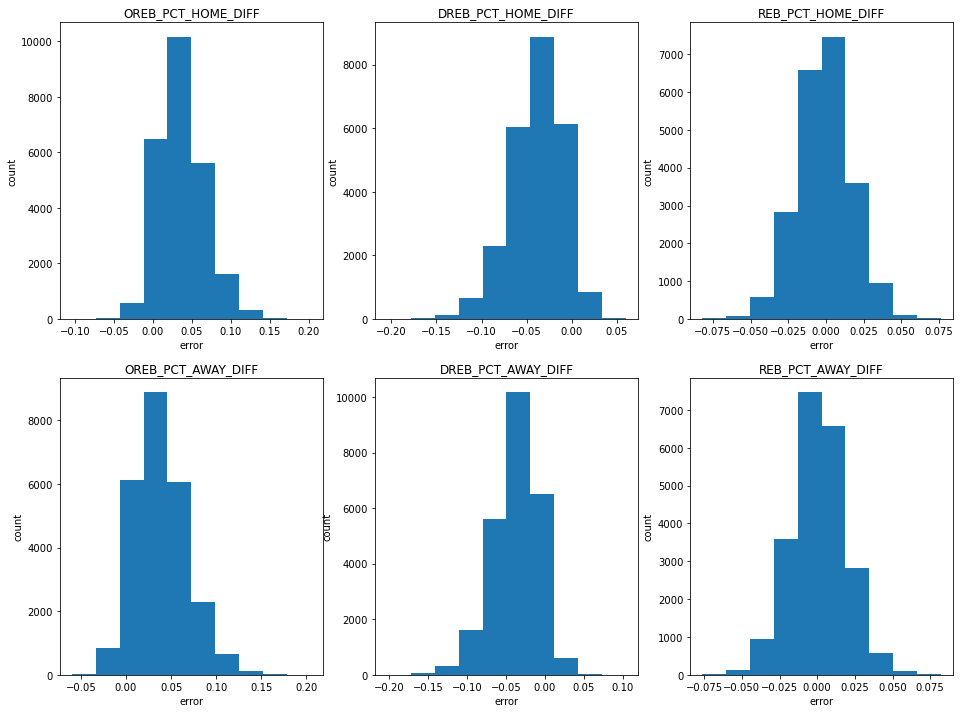

In [11]:
#plot error of calculated rebound percentage stats
fig, axes = plt.subplots(2, 3, figsize=[16, 12])

axes[0,0].hist(team_boxscores_df['OREB_PCT_CALC_HOME_DIFF'])
axes[0,0].set_title('OREB_PCT_HOME_DIFF')
axes[0,0].set_xlabel('error')
axes[0,0].set_ylabel('count')

axes[0,1].hist(team_boxscores_df['DREB_PCT_CALC_HOME_DIFF'])
axes[0,1].set_title('DREB_PCT_HOME_DIFF')
axes[0,1].set_xlabel('error')
axes[0,1].set_ylabel('count')

axes[0,2].hist(team_boxscores_df['REB_PCT_CALC_HOME_DIFF'])
axes[0,2].set_title('REB_PCT_HOME_DIFF')
axes[0,2].set_xlabel('error')
axes[0,2].set_ylabel('count')

axes[1,0].hist(team_boxscores_df['OREB_PCT_CALC_AWAY_DIFF'])
axes[1,0].set_title('OREB_PCT_AWAY_DIFF')
axes[1,0].set_xlabel('error')
axes[1,0].set_ylabel('count')

axes[1,1].hist(team_boxscores_df['DREB_PCT_CALC_AWAY_DIFF'])
axes[1,1].set_title('DREB_PCT_AWAY_DIFF')
axes[1,1].set_xlabel('error')
axes[1,1].set_ylabel('count')

axes[1,2].hist(team_boxscores_df['REB_PCT_CALC_AWAY_DIFF'])
axes[1,2].set_title('REB_PCT_AWAY_DIFF')
axes[1,2].set_xlabel('error')
axes[1,2].set_ylabel('count')

In [12]:
#fill in missing rebound percentage stats with calculated values
rebound_pct_cols = ['OREB_PCT_HOME', 'DREB_PCT_HOME', 'REB_PCT_HOME', 'OREB_PCT_AWAY', 'DREB_PCT_AWAY', 'REB_PCT_AWAY']

for col in rebound_pct_cols:
    team_boxscores_df[col].fillna(value=team_boxscores_df[col + '_CALC'], inplace=True)

team_boxscores_df.drop(columns=['OREB_PCT_CALC_HOME_DIFF',
                                'DREB_PCT_CALC_HOME_DIFF',
                                'REB_PCT_CALC_HOME_DIFF',
                                'OREB_PCT_CALC_AWAY_DIFF',
                                'DREB_PCT_CALC_AWAY_DIFF',
                                'REB_PCT_CALC_AWAY_DIFF',
                                'OREB_PCT_HOME_CALC',
                                'DREB_PCT_HOME_CALC',
                                'REB_PCT_HOME_CALC',
                                'OREB_PCT_AWAY_CALC',
                                'DREB_PCT_AWAY_CALC',
                                'REB_PCT_AWAY_CALC'], inplace=True)

In [13]:
team_boxscores_df['WL_HOME'] = team_boxscores_df['WL_HOME'].map({'W':1, 'L':0})
team_boxscores_df['WL_AWAY'] = team_boxscores_df['WL_AWAY'].map({'W':1, 'L':0})

team_boxscores_df.head()

,SEASON,TEAM_ID_HOME,GAME_ID,GAME_DATE,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_CITY_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME,TEAM_ID_AWAY,WL_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,TEAM_CITY_AWAY,E_OFF_RATING_AWAY,OFF_RATING_AWAY,E_DEF_RATING_AWAY,DEF_RATING_AWAY,E_NET_RATING_AWAY,NET_RATING_AWAY,AST_PCT_AWAY,AST_TOV_AWAY,AST_RATIO_AWAY,OREB_PCT_AWAY,DREB_PCT_AWAY,REB_PCT_AWAY,E_TM_TOV_PCT_AWAY,TM_TOV_PCT_AWAY,EFG_PCT_AWAY,TS_PCT_AWAY,USG_PCT_AWAY,E_USG_PCT_AWAY,E_PACE_AWAY,PACE_AWAY,PACE_PER40_AWAY,POSS_AWAY,PIE_AWAY
1314,2021-22,1610612738,0042100404,2022-06-10,0,34,85,0.400,15,38,0.395,14,19,0.737,11,31,42,22,8,6,16,17,97,-10,Boston,98.6,101.0,109.6,111.5,-11.0,-10.4,0.647,1.38,16.7,0.264,0.615,0.438,16.267,16.7,0.488,0.519,1.0,0.196,97.98,96.0,80.00,96.0,0.448,1610612744,1,40,91,0.440,15,43,0.349,12,15,0.800,16,39,55,20,10,5,16,21,107,10,Golden State,109.6,111.5,98.6,101.0,11.0,10.4,0.500,1.25,15.0,0.385,0.736,0.562,16.393,16.7,0.522,0.548,1.0,0.201,97.98,96.0,80.00,96.0,0.552
1313,2021-22,1610612738,0042100403,2022-06-08,1,43,89,0.483,13,35,0.371,17,24,0.708,15,32,47,28,7,7,12,17,116,16,Boston,120.1,122.1,104.6,106.4,15.5,15.7,0.651,2.33,20.1,0.408,0.810,0.593,12.428,12.6,0.556,0.583,1.0,0.201,96.08,94.5,78.75,95.0,0.597,1610612744,0,36,78,0.462,15,40,0.375,13,15,0.867,6,25,31,22,7,5,17,23,100,-16,Golden State,104.6,106.4,120.1,122.1,-15.5,-15.7,0.611,1.29,17.8,0.190,0.592,0.407,17.782,18.1,0.558,0.591,1.0,0.199,96.08,94.5,78.75,94.0,0.403
1312,2021-22,1610612744,0042100402,2022-06-05,1,39,86,0.453,15,37,0.405,14,20,0.700,6,36,42,25,15,2,12,17,107,19,Golden State,106.2,110.3,87.6,89.8,18.6,20.5,0.641,2.08,19.0,0.224,0.780,0.505,11.905,12.4,0.541,0.564,1.0,0.200,100.64,97.5,81.25,97.0,0.602,1610612738,0,30,80,0.375,15,37,0.405,13,17,0.765,6,37,43,24,5,7,19,18,88,-19,Boston,87.6,89.8,106.2,110.3,-18.6,-20.5,0.800,1.26,18.4,0.220,0.776,0.495,18.909,19.4,0.469,0.503,1.0,0.197,100.64,97.5,81.25,98.0,0.398
1311,2021-22,1610612744,0042100401,2022-06-02,0,39,88,0.443,19,45,0.422,11,15,0.733,12,27,39,24,8,6,14,16,108,-12,Golden State,111.8,114.9,122.4,129.0,-10.6,-14.1,0.615,1.71,18.1,0.353,0.698,0.511,14.493,14.9,0.551,0.571,1.0,0.201,97.32,93.5,77.92,94.0,0.422,1610612738,1,43,85,0.506,21,41,0.512,13,16,0.813,7,32,39,33,7,6,13,13,120,12,Boston,122.4,129.0,111.8,114.9,10.6,14.1,0.767,2.54,23.9,0.302,0.647,0.489,13.260,14.0,0.629,0.652,1.0,0.198,97.32,93.5,77.92,93.0,0.578
1310,2021-22,1610612748,0042100307,2022-05-29,0,37,88,0.420,6,30,0.200,16,24,0.667,7,37,44,16,4,5,10,18,96,-4,Miami,94.5,99.0,101.5,103.1,-6.9,-4.1,0.432,1.60,12.8,0.214,0.741,0.473,9.846,10.3,0.455,0.487,1.0,0.193,100.06,97.0,80.83,97.0,0.471,1610612738,1,35,85,0.412,11,32,0.344,19,24,0.792,10,41,51,22,4,6,13,26,100,4,Boston,101.5,103.1,94.5,99.0,6.9,4.1,0.629,1.69,16.9,0.259,0.786,0.527,13.190,13.4,0.476,0.523,1.0,0.201,100.06,97.0,80.83,97.0,0.529


In [14]:
team_boxscores_df.describe()

team_boxscores_df.columns

Index(['SEASON', 'TEAM_ID_HOME', 'GAME_ID', 'GAME_DATE', 'WL_HOME', 'FGM_HOME',
       'FGA_HOME', 'FG_PCT_HOME', 'FG3M_HOME', 'FG3A_HOME', 'FG3_PCT_HOME',
       'FTM_HOME', 'FTA_HOME', 'FT_PCT_HOME', 'OREB_HOME', 'DREB_HOME',
       'REB_HOME', 'AST_HOME', 'STL_HOME', 'BLK_HOME', 'TOV_HOME', 'PF_HOME',
       'PTS_HOME', 'PLUS_MINUS_HOME', 'TEAM_CITY_HOME', 'E_OFF_RATING_HOME',
       'OFF_RATING_HOME', 'E_DEF_RATING_HOME', 'DEF_RATING_HOME',
       'E_NET_RATING_HOME', 'NET_RATING_HOME', 'AST_PCT_HOME', 'AST_TOV_HOME',
       'AST_RATIO_HOME', 'OREB_PCT_HOME', 'DREB_PCT_HOME', 'REB_PCT_HOME',
       'E_TM_TOV_PCT_HOME', 'TM_TOV_PCT_HOME', 'EFG_PCT_HOME', 'TS_PCT_HOME',
       'USG_PCT_HOME', 'E_USG_PCT_HOME', 'E_PACE_HOME', 'PACE_HOME',
       'PACE_PER40_HOME', 'POSS_HOME', 'PIE_HOME', 'TEAM_ID_AWAY', 'WL_AWAY',
       'FGM_AWAY', 'FGA_AWAY', 'FG_PCT_AWAY', 'FG3M_AWAY', 'FG3A_AWAY',
       'FG3_PCT_AWAY', 'FTM_AWAY', 'FTA_AWAY', 'FT_PCT_AWAY', 'OREB_AWAY',
       'DREB_AWAY', 'REB_

In [15]:
#create temp dataframe for moving average calculations
home_team_boxscores_temp_df = team_boxscores_df.iloc[:,:48]
away_team_boxscores_temp_df = pd.DataFrame(columns=home_team_boxscores_temp_df.columns)
for col in away_team_boxscores_temp_df.columns:
    if col[-4:]!='HOME':
        away_team_boxscores_temp_df[col] = team_boxscores_df[col]
    else:
        away_team_boxscores_temp_df[col] = team_boxscores_df[col[:-5] + '_AWAY']
        
team_boxscores_temp_df = pd.concat([home_team_boxscores_temp_df, away_team_boxscores_temp_df])

for col in team_boxscores_temp_df:
    if col[-4:]=='HOME':
        team_boxscores_temp_df.rename(columns={col:col[:-5]}, inplace=True)
        
team_boxscores_temp_df.head()

,SEASON,TEAM_ID,GAME_ID,GAME_DATE,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,TEAM_CITY,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
1314,2021-22,1610612738,0042100404,2022-06-10,0,34,85,0.400,15,38,0.395,14,19,0.737,11,31,42,22,8,6,16,17,97,-10,Boston,98.6,101.0,109.6,111.5,-11.0,-10.4,0.647,1.38,16.7,0.264,0.615,0.438,16.267,16.7,0.488,0.519,1.0,0.196,97.98,96.0,80.00,96.0,0.448
1313,2021-22,1610612738,0042100403,2022-06-08,1,43,89,0.483,13,35,0.371,17,24,0.708,15,32,47,28,7,7,12,17,116,16,Boston,120.1,122.1,104.6,106.4,15.5,15.7,0.651,2.33,20.1,0.408,0.810,0.593,12.428,12.6,0.556,0.583,1.0,0.201,96.08,94.5,78.75,95.0,0.597
1312,2021-22,1610612744,0042100402,2022-06-05,1,39,86,0.453,15,37,0.405,14,20,0.700,6,36,42,25,15,2,12,17,107,19,Golden State,106.2,110.3,87.6,89.8,18.6,20.5,0.641,2.08,19.0,0.224,0.780,0.505,11.905,12.4,0.541,0.564,1.0,0.200,100.64,97.5,81.25,97.0,0.602
1311,2021-22,1610612744,0042100401,2022-06-02,0,39,88,0.443,19,45,0.422,11,15,0.733,12,27,39,24,8,6,14,16,108,-12,Golden State,111.8,114.9,122.4,129.0,-10.6,-14.1,0.615,1.71,18.1,0.353,0.698,0.511,14.493,14.9,0.551,0.571,1.0,0.201,97.32,93.5,77.92,94.0,0.422
1310,2021-22,1610612748,0042100307,2022-05-29,0,37,88,0.420,6,30,0.200,16,24,0.667,7,37,44,16,4,5,10,18,96,-4,Miami,94.5,99.0,101.5,103.1,-6.9,-4.1,0.432,1.60,12.8,0.214,0.741,0.473,9.846,10.3,0.455,0.487,1.0,0.193,100.06,97.0,80.83,97.0,0.471


In [16]:
team_boxscores_temp_df.shape

(56304, 48)

In [17]:
home_team_boxscores_temp_df.head()

,SEASON,TEAM_ID_HOME,GAME_ID,GAME_DATE,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_CITY_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME
1314,2021-22,1610612738,0042100404,2022-06-10,0,34,85,0.400,15,38,0.395,14,19,0.737,11,31,42,22,8,6,16,17,97,-10,Boston,98.6,101.0,109.6,111.5,-11.0,-10.4,0.647,1.38,16.7,0.264,0.615,0.438,16.267,16.7,0.488,0.519,1.0,0.196,97.98,96.0,80.00,96.0,0.448
1313,2021-22,1610612738,0042100403,2022-06-08,1,43,89,0.483,13,35,0.371,17,24,0.708,15,32,47,28,7,7,12,17,116,16,Boston,120.1,122.1,104.6,106.4,15.5,15.7,0.651,2.33,20.1,0.408,0.810,0.593,12.428,12.6,0.556,0.583,1.0,0.201,96.08,94.5,78.75,95.0,0.597
1312,2021-22,1610612744,0042100402,2022-06-05,1,39,86,0.453,15,37,0.405,14,20,0.700,6,36,42,25,15,2,12,17,107,19,Golden State,106.2,110.3,87.6,89.8,18.6,20.5,0.641,2.08,19.0,0.224,0.780,0.505,11.905,12.4,0.541,0.564,1.0,0.200,100.64,97.5,81.25,97.0,0.602
1311,2021-22,1610612744,0042100401,2022-06-02,0,39,88,0.443,19,45,0.422,11,15,0.733,12,27,39,24,8,6,14,16,108,-12,Golden State,111.8,114.9,122.4,129.0,-10.6,-14.1,0.615,1.71,18.1,0.353,0.698,0.511,14.493,14.9,0.551,0.571,1.0,0.201,97.32,93.5,77.92,94.0,0.422
1310,2021-22,1610612748,0042100307,2022-05-29,0,37,88,0.420,6,30,0.200,16,24,0.667,7,37,44,16,4,5,10,18,96,-4,Miami,94.5,99.0,101.5,103.1,-6.9,-4.1,0.432,1.60,12.8,0.214,0.741,0.473,9.846,10.3,0.455,0.487,1.0,0.193,100.06,97.0,80.83,97.0,0.471


In [18]:
away_team_boxscores_temp_df.head()

,SEASON,TEAM_ID_HOME,GAME_ID,GAME_DATE,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_CITY_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME
1314,2021-22,1610612744,0042100404,2022-06-10,1,40,91,0.440,15,43,0.349,12,15,0.800,16,39,55,20,10,5,16,21,107,10,Golden State,109.6,111.5,98.6,101.0,11.0,10.4,0.500,1.25,15.0,0.385,0.736,0.562,16.393,16.7,0.522,0.548,1.0,0.201,97.98,96.0,80.00,96.0,0.552
1313,2021-22,1610612744,0042100403,2022-06-08,0,36,78,0.462,15,40,0.375,13,15,0.867,6,25,31,22,7,5,17,23,100,-16,Golden State,104.6,106.4,120.1,122.1,-15.5,-15.7,0.611,1.29,17.8,0.190,0.592,0.407,17.782,18.1,0.558,0.591,1.0,0.199,96.08,94.5,78.75,94.0,0.403
1312,2021-22,1610612738,0042100402,2022-06-05,0,30,80,0.375,15,37,0.405,13,17,0.765,6,37,43,24,5,7,19,18,88,-19,Boston,87.6,89.8,106.2,110.3,-18.6,-20.5,0.800,1.26,18.4,0.220,0.776,0.495,18.909,19.4,0.469,0.503,1.0,0.197,100.64,97.5,81.25,98.0,0.398
1311,2021-22,1610612738,0042100401,2022-06-02,1,43,85,0.506,21,41,0.512,13,16,0.813,7,32,39,33,7,6,13,13,120,12,Boston,122.4,129.0,111.8,114.9,10.6,14.1,0.767,2.54,23.9,0.302,0.647,0.489,13.260,14.0,0.629,0.652,1.0,0.198,97.32,93.5,77.92,93.0,0.578
1310,2021-22,1610612738,0042100307,2022-05-29,1,35,85,0.412,11,32,0.344,19,24,0.792,10,41,51,22,4,6,13,26,100,4,Boston,101.5,103.1,94.5,99.0,6.9,4.1,0.629,1.69,16.9,0.259,0.786,0.527,13.190,13.4,0.476,0.523,1.0,0.201,100.06,97.0,80.83,97.0,0.529


In [19]:
team_boxscores_df.head()

,SEASON,TEAM_ID_HOME,GAME_ID,GAME_DATE,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_CITY_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME,TEAM_ID_AWAY,WL_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,TEAM_CITY_AWAY,E_OFF_RATING_AWAY,OFF_RATING_AWAY,E_DEF_RATING_AWAY,DEF_RATING_AWAY,E_NET_RATING_AWAY,NET_RATING_AWAY,AST_PCT_AWAY,AST_TOV_AWAY,AST_RATIO_AWAY,OREB_PCT_AWAY,DREB_PCT_AWAY,REB_PCT_AWAY,E_TM_TOV_PCT_AWAY,TM_TOV_PCT_AWAY,EFG_PCT_AWAY,TS_PCT_AWAY,USG_PCT_AWAY,E_USG_PCT_AWAY,E_PACE_AWAY,PACE_AWAY,PACE_PER40_AWAY,POSS_AWAY,PIE_AWAY
1314,2021-22,1610612738,0042100404,2022-06-10,0,34,85,0.400,15,38,0.395,14,19,0.737,11,31,42,22,8,6,16,17,97,-10,Boston,98.6,101.0,109.6,111.5,-11.0,-10.4,0.647,1.38,16.7,0.264,0.615,0.438,16.267,16.7,0.488,0.519,1.0,0.196,97.98,96.0,80.00,96.0,0.448,1610612744,1,40,91,0.440,15,43,0.349,12,15,0.800,16,39,55,20,10,5,16,21,107,10,Golden State,109.6,111.5,98.6,101.0,11.0,10.4,0.500,1.25,15.0,0.385,0.736,0.562,16.393,16.7,0.522,0.548,1.0,0.201,97.98,96.0,80.00,96.0,0.552
1313,2021-22,1610612738,0042100403,2022-06-08,1,43,89,0.483,13,35,0.371,17,24,0.708,15,32,47,28,7,7,12,17,116,16,Boston,120.1,122.1,104.6,106.4,15.5,15.7,0.651,2.33,20.1,0.408,0.810,0.593,12.428,12.6,0.556,0.583,1.0,0.201,96.08,94.5,78.75,95.0,0.597,1610612744,0,36,78,0.462,15,40,0.375,13,15,0.867,6,25,31,22,7,5,17,23,100,-16,Golden State,104.6,106.4,120.1,122.1,-15.5,-15.7,0.611,1.29,17.8,0.190,0.592,0.407,17.782,18.1,0.558,0.591,1.0,0.199,96.08,94.5,78.75,94.0,0.403
1312,2021-22,1610612744,0042100402,2022-06-05,1,39,86,0.453,15,37,0.405,14,20,0.700,6,36,42,25,15,2,12,17,107,19,Golden State,106.2,110.3,87.6,89.8,18.6,20.5,0.641,2.08,19.0,0.224,0.780,0.505,11.905,12.4,0.541,0.564,1.0,0.200,100.64,97.5,81.25,97.0,0.602,1610612738,0,30,80,0.375,15,37,0.405,13,17,0.765,6,37,43,24,5,7,19,18,88,-19,Boston,87.6,89.8,106.2,110.3,-18.6,-20.5,0.800,1.26,18.4,0.220,0.776,0.495,18.909,19.4,0.469,0.503,1.0,0.197,100.64,97.5,81.25,98.0,0.398
1311,2021-22,1610612744,0042100401,2022-06-02,0,39,88,0.443,19,45,0.422,11,15,0.733,12,27,39,24,8,6,14,16,108,-12,Golden State,111.8,114.9,122.4,129.0,-10.6,-14.1,0.615,1.71,18.1,0.353,0.698,0.511,14.493,14.9,0.551,0.571,1.0,0.201,97.32,93.5,77.92,94.0,0.422,1610612738,1,43,85,0.506,21,41,0.512,13,16,0.813,7,32,39,33,7,6,13,13,120,12,Boston,122.4,129.0,111.8,114.9,10.6,14.1,0.767,2.54,23.9,0.302,0.647,0.489,13.260,14.0,0.629,0.652,1.0,0.198,97.32,93.5,77.92,93.0,0.578
1310,2021-22,1610612748,0042100307,2022-05-29,0,37,88,0.420,6,30,0.200,16,24,0.667,7,37,44,16,4,5,10,18,96,-4,Miami,94.5,99.0,101.5,103.1,-6.9,-4.1,0.432,1.60,12.8,0.214,0.741,0.473,9.846,10.3,0.455,0.487,1.0,0.193,100.06,97.0,80.83,97.0,0.471,1610612738,1,35,85,0.412,11,32,0.344,19,24,0.792,10,41,51,22,4,6,13,26,100,4,Boston,101.5,103.1,94.5,99.0,6.9,4.1,0.629,1.69,16.9,0.259,0.786,0.527,13.190,13.4,0.476,0.523,1.0,0.201,100.06,97.0,80.83,97.0,0.529


In [28]:
#turn each row's stats into average of last n games
n = 20
non_metric_cols = set(['SEASON', 'TEAM_ID_HOME', 'GAME_ID', 'GAME_DATE', 'TEAM_CITY_HOME', 'TEAM_ID_AWAY','TEAM_CITY_AWAY'])
metric_cols = set(team_boxscores_df.columns) - non_metric_cols

moving_average_df = pd.DataFrame(columns=team_boxscores_df.columns)

for i, row in tqdm(team_boxscores_df.iterrows()):
    game_date = row['GAME_DATE']
    home_team = row['TEAM_ID_HOME']
    away_team = row['TEAM_ID_AWAY']
    
    team_boxscores_temp_df = team_boxscores_temp_df[team_boxscores_temp_df['GAME_DATE'] < game_date].copy()
    
    if len(team_boxscores_temp_df)==0:
        continue
    
    home_team_temp_df = team_boxscores_temp_df[team_boxscores_temp_df['TEAM_ID']==home_team].copy()
    away_team_temp_df = team_boxscores_temp_df[team_boxscores_temp_df['TEAM_ID']==away_team].copy()
    
    if len(home_team_temp_df)<n or len(away_team_temp_df)<n:
        continue
    
    home_team_temp_df.sort_values(by='GAME_DATE', ascending=False, inplace=True)
    away_team_temp_df.sort_values(by='GAME_DATE', ascending=False, inplace=True)
    
    home_team_temp_df = home_team_temp_df.iloc[:n].copy()
    away_team_temp_df = away_team_temp_df.iloc[:n].copy()
    
    new_row = defaultdict()
    for col in team_boxscores_df.columns:
        if col in non_metric_cols:
            new_row[col] = row[col]
        elif col[-4:]=='HOME':
            new_row[col] = home_team_temp_df[col[:-5]].mean()
        elif col[-4:]=='AWAY':
            new_row[col] = away_team_temp_df[col[:-5]].mean()
    
    moving_average_df = moving_average_df.append(new_row, ignore_index=True)


28152it [41:38, 11.27it/s] 


In [29]:
moving_average_df.head()

,SEASON,TEAM_ID_HOME,GAME_ID,GAME_DATE,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_CITY_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME,TEAM_ID_AWAY,WL_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,TEAM_CITY_AWAY,E_OFF_RATING_AWAY,OFF_RATING_AWAY,E_DEF_RATING_AWAY,DEF_RATING_AWAY,E_NET_RATING_AWAY,NET_RATING_AWAY,AST_PCT_AWAY,AST_TOV_AWAY,AST_RATIO_AWAY,OREB_PCT_AWAY,DREB_PCT_AWAY,REB_PCT_AWAY,E_TM_TOV_PCT_AWAY,TM_TOV_PCT_AWAY,EFG_PCT_AWAY,TS_PCT_AWAY,USG_PCT_AWAY,E_USG_PCT_AWAY,E_PACE_AWAY,PACE_AWAY,PACE_PER40_AWAY,POSS_AWAY,PIE_AWAY
0,2021-22,1610612738,0042100404,2022-06-10,0.45,38.95,85.85,0.4557,12.5,35.7,0.34530,17.45,21.60,0.81295,11.3,33.45,44.75,22.60,7.40,6.25,14.90,18.85,107.85,2.1,Boston,109.15,110.755,104.915,108.250,4.24,2.505,0.58015,1.6165,16.985,0.28505,0.70540,0.49885,14.95030,15.150,0.52935,0.56790,1.0,0.19750,98.8205,96.6015,80.5005,97.55,0.51215,1610612744,0.60,39.10,85.80,0.4555,13.4,38.5,0.3464,15.05,20.45,0.74095,9.6,35.30,44.90,26.65,9.3,5.00,14.8,20.30,106.65,3.7,Golden State,106.66,109.055,102.650,105.19,4.02,3.865,0.67805,1.9615,19.425,0.27060,0.7417,0.50830,14.8138,15.135,0.53365,0.56245,1.0,0.1981,100.1490,97.8500,81.5420,97.85,0.52315
1,2021-22,1610612738,0042100403,2022-06-08,0.45,38.95,85.85,0.4557,12.5,35.7,0.34530,17.45,21.60,0.81295,11.3,33.45,44.75,22.60,7.40,6.25,14.90,18.85,107.85,2.1,Boston,109.15,110.755,104.915,108.250,4.24,2.505,0.58015,1.6165,16.985,0.28505,0.70540,0.49885,14.95030,15.150,0.52935,0.56790,1.0,0.19750,98.8205,96.6015,80.5005,97.55,0.51215,1610612744,0.60,39.10,85.80,0.4555,13.4,38.5,0.3464,15.05,20.45,0.74095,9.6,35.30,44.90,26.65,9.3,5.00,14.8,20.30,106.65,3.7,Golden State,106.66,109.055,102.650,105.19,4.02,3.865,0.67805,1.9615,19.425,0.27060,0.7417,0.50830,14.8138,15.135,0.53365,0.56245,1.0,0.1981,100.1490,97.8500,81.5420,97.85,0.52315
2,2021-22,1610612744,0042100402,2022-06-05,0.60,39.10,85.80,0.4555,13.4,38.5,0.34640,15.05,20.45,0.74095,9.6,35.30,44.90,26.65,9.30,5.00,14.80,20.30,106.65,3.7,Golden State,106.66,109.055,102.650,105.190,4.02,3.865,0.67805,1.9615,19.425,0.27060,0.74170,0.50830,14.81380,15.135,0.53365,0.56245,1.0,0.19810,100.1490,97.8500,81.5420,97.85,0.52315,1610612738,0.45,38.95,85.85,0.4557,12.5,35.7,0.3453,17.45,21.60,0.81295,11.3,33.45,44.75,22.60,7.4,6.25,14.9,18.85,107.85,2.1,Boston,109.15,110.755,104.915,108.25,4.24,2.505,0.58015,1.6165,16.985,0.28505,0.7054,0.49885,14.9503,15.150,0.52935,0.56790,1.0,0.1975,98.8205,96.6015,80.5005,97.55,0.51215
3,2021-22,1610612744,0042100401,2022-06-02,0.60,39.10,85.80,0.4555,13.4,38.5,0.34640,15.05,20.45,0.74095,9.6,35.30,44.90,26.65,9.30,5.00,14.80,20.30,106.65,3.7,Golden State,106.66,109.055,102.650,105.190,4.02,3.865,0.67805,1.9615,19.425,0.27060,0.74170,0.50830,14.81380,15.135,0.53365,0.56245,1.0,0.19810,100.1490,97.8500,81.5420,97.85,0.52315,1610612738,0.45,38.95,85.85,0.4557,12.5,35.7,0.3453,17.45,21.60,0.81295,11.3,33.45,44.75,22.60,7.4,6.25,14.9,18.85,107.85,2.1,Boston,109.15,110.755,104.915,108.25,4.24,2.505,0.58015,1.6165,16.985,0.28505,0.7054,0.49885,14.9503,15.150,0.52935,0.56790,1.0,0.1975,98.8205,96.6015,80.5005,97.55,0.51215
4,2021-22,1610612748,0042100307,2022-05-29,0.70,39.75,85.60,0.4647,15.7,38.4,0.40525,15.10,18.70,0.81130,11.2,33.45,44.65,27.25,6.25,3.95,14.65,19.35,110.30,5.5,Miami,113.50,114.920,106.420,109.085,7.09,5.845,0.69140,2.0085,20.050,0.29485,0.73225,0.51595,15.04895,15.245,0.55715,0.58895,1.0,0

In [30]:
moving_average_df.describe()

,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME,WL_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,E_OFF_RATING_AWAY,OFF_RATING_AWAY,E_DEF_RATING_AWAY,DEF_RATING_AWAY,E_NET_RATING_AWAY,NET_RATING_AWAY,AST_PCT_AWAY,AST_TOV_AWAY,AST_RATIO_AWAY,OREB_PCT_AWAY,DREB_PCT_AWAY,REB_PCT_AWAY,E_TM_TOV_PCT_AWAY,TM_TOV_PCT_AWAY,EFG_PCT_AWAY,TS_PCT_AWAY,USG_PCT_AWAY,E_USG_PCT_AWAY,E_PACE_AWAY,PACE_AWAY,PACE_PER40_AWAY,POSS_AWAY,PIE_AWAY
count,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.0,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.00000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.0,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000,27834.000000
mean,0.498694,37.557843,82.863568,0.454141,7.728431,21.688757,0.353052,18.110347,23.857342,0.759779,10.970071,31.667723,42.637794,22.049772,7.564288,4.889867,14.356386,20.947113,100.954464,-0.038753,104.339149,105.958895,104.374855,105.997028,-0.035659,-0.038154,0.586250,1.682218,16.890506,0.288959,0.710785,0.499852,14.834798,15.074320,0.500481,0.541394,1.0,0.198497,96.047041,94.539011,78.782510,95.225900,0.499715,0.501532,37.584891,82.898090,0.454269,7.723444,21.673231,0.352979,18.126042,23.876311,0.75984,10.984799,31.695234,42.680033,22.079669,7.562438,4.899111,14.350948,20.939766,101.019268,0.050108,104.380147,106.000766,104.331559,105.949214,0.048558,0.051588,0.586609,1.685358,16.904683,0.289260,0.711063,0.500188,14.825284,15.064699,0.500565,0.541489,1.0,0.198500,96.064237,94.557438,78.797861,95.247722,0.500347
std,0.174537,2.610826,4.268342,0.019488,2.960381,7.895003,0.030627,2.332253,3.067085,0.036400,1.577344,2.467760,2.479716,2.423227,1.045748,0.964719,1.414294,1.924807,7.322315,5.161186,4.821753,4.834585,4.580149,4.594835,5.639346,5.357591,0.046197,0.278687,1.399753,0.032445,0.026666,0.017108,1.511568,1.541067,0.028720,0.025855,0.0,0.000631,4.030414,3.885836,3.238192,3.895102,0.037681,0.174369,2.618472,4.248176,0.019588,2.950257,7.862739,0.030343,2.317109,3.046920,0.03628,1.585754,2.472462,2.479587,2.414909,1.045182,0.967496,1.421185,1.922694,7.335206,5.158238,4.832625,4.843646,4.581011,4.593251,5.632368,5.353470,0.045875,0.280516,1.395431,0.032481,0.026598,0.017086,1.511486,1.541325,0.028747,0.025894,0.0,0.000632,4.029586,3.884852,3.237371,3.890101,0.037680
min,0.000000,29.150000,70.350000,0.377100,1.900000,6.400000,0.220550,9.550000,13.750000,0.582750,5.950000,24.150000,33.850000,14.700000,4.300000,1.600000,9.250000,14.400000,78.800000,-19.750000,83.000000,86.685000,84.600000,86.140000,-20.

In [43]:
def check_missing_vals(df):
    cols_w_missing_vals = []
    for col in df.columns:
        if df[col].isna().sum() != 0:
            cols_w_missing_vals.append(col)
    return cols_w_missing_vals

In [44]:
check_missing_vals(moving_average_df)

[]

In [45]:
moving_average_df.shape

(27834, 93)

In [ ]:
#turn each row's stats into weighted average of last n game stats

#instead of taking average of all metrics, it may be better to recalculate some of the agg metrics (e.g FB_PCT, AST_TOV, etc.)
#over last n games